## NLM Filtering

In [1]:
import cv2
import numpy as np
import math as m
import random
import matplotlib.pyplot as plt

In [2]:
g=cv2.imread("krishna_0_001.png")/255
f=cv2.imread("krishna.png")/255
x,y,c=np.shape(g)


In [6]:
def PSNR(original,noisy):
    mse=np.mean((original-noisy)**2)
    maximum=np.max(original)
    return 10*np.log10(maximum*maximum/mse)

In [7]:
def zero_pad_image(image,padding):
    x,y=np.shape(image)
    padded_image = np.zeros((x+2*padding, y+2*padding))
    padded_image[padding:-padding, padding:-padding] = image
    return padded_image

In [8]:
def zero_padded_image_colour(image,w,wsim):
    padding=w+wsim
    x, y, _ = np.shape(image)
    padded_image = np.zeros((x+2*padding, y+2*padding,3))
    for i in range(3):
        padded_image[padding:-padding, padding:-padding,i] = image[:,:,i]
    return padded_image

In [9]:
def gaussian(p,q,h):
    p=np.ravel(p)
    q=np.ravel(q)
    if sigma > 0:
        return np.exp(np.sum((-1*(p-q)**2)/(h**2)))
    else:
        if np.sum(np.abs(p-q)) == 0:
            return 1
        else:
            return 0
        
    

In [10]:
def weights(p_patch,q_patch,d,wsim,h):
    weights = np.zeros((2*d+1 - 2*wsim, 2*d+1 - 2*wsim))
    filtered=0
    for i in range(wsim,2*d+1-wsim):
        for j in range(wsim,2*d+1-wsim):
            q = q_patch[i-wsim:i+wsim+1, j-wsim:j+wsim+1]
            weights[i-wsim, j-wsim] = gaussian(p_patch, q, h)
            filtered+=weights[i-wsim, j-wsim]*q_patch[i,j]
            
    return filtered/np.sum(weights),weights/np.sum(weights)
     
     

In [11]:
def NLM(image,w,wsim,sigma):
    x, y, _ = np.shape(image)
    padded_image = zero_padded_image_colour(image, w, wsim)
    d=w+wsim
    filtered_image = np.zeros((x, y, 3))
    for channel in range(3):
        image_channel = padded_image[:, :, channel]
        for i in range(d,x+d):
            for j in range(d,x+d):
                p_patch=image_channel[i-wsim:i+wsim+1,j-wsim:j+wsim+1]
                q_patch=image_channel[i-d:i+d+1, j-d:j+d+1]
                filtered_image[i-d, j-d, channel] = weights(p_patch, q_patch, d, wsim, sigma)[0]
    return filtered_image

In [17]:
wsim=3
W=[3,5]
sigmas=[0.1,0.2,0.3,0.4,0.5]
NLM_data={}
for sigma in sigmas:
    for w in W:
        NLM_filtered_image=NLM(g,w,wsim,sigma)
        NLM_data[(sigma,w)]=NLM_filtered_image
        print("The PSNR FOR IMAGE DENOISED WITH SIGMA",sigma," is :",PSNR(f,NLM_filtered_image),"for W=",w)

        

The PSNR FOR IMAGE DENOISED WITH SIGMA 0.1  is : 38.53715703200068 for W= 3
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.1  is : 38.58683796630019 for W= 5
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.2  is : 38.29664620248695 for W= 3
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.2  is : 37.5035155424139 for W= 5
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.3  is : 34.37862514854472 for W= 3
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.3  is : 32.94483443560798 for W= 5
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.4  is : 31.520439191501502 for W= 3
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.4  is : 30.108129806208538 for W= 5
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.5  is : 29.599583859221337 for W= 3
The PSNR FOR IMAGE DENOISED WITH SIGMA 0.5  is : 28.241168540558796 for W= 5


In [3]:
g=cv2.cvtColor(g, cv2.COLOR_BGR2RGB )
plt.imshow(g)
plt.title("Noisy Image")
plt.axis('off')

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


(-0.5, 127.5, 127.5, -0.5)

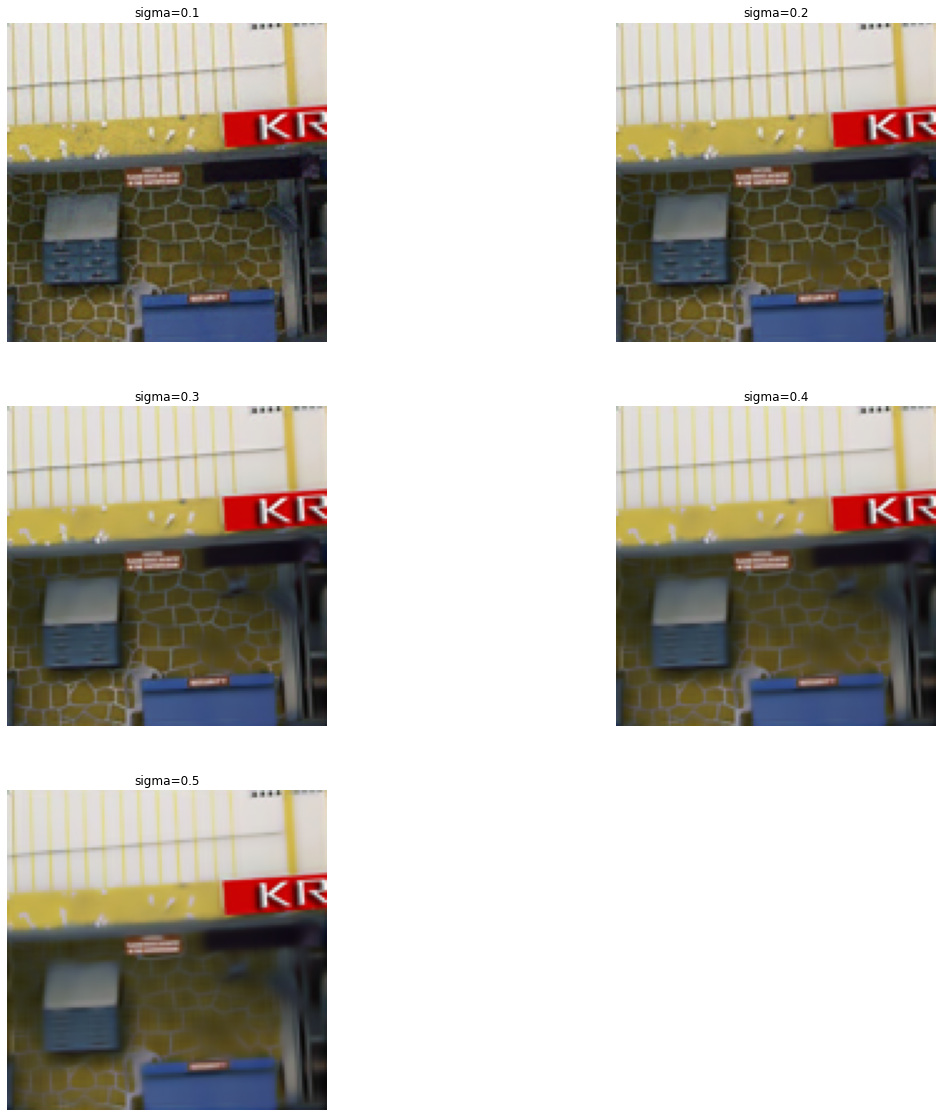

In [34]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(3, 2, 1)
plt.imshow(NLM_data[(sigmas[0], W[0])])
plt.title("sigma=0.1")
plt.axis('off')
fig.add_subplot(3, 2, 2)
plt.imshow(NLM_data[(sigmas[1], W[0])])
plt.title("sigma=0.2")
plt.axis('off')
fig.add_subplot(3, 2, 3)
plt.imshow(NLM_data[(sigmas[2], W[0])])
plt.title("sigma=0.3")
plt.axis('off')
fig.add_subplot(3, 2, 4)
plt.imshow(NLM_data[(sigmas[3], W[0])])
plt.title("sigma=0.4")
plt.axis('off')
fig.add_subplot(3, 2, 5)
plt.imshow(NLM_data[(sigmas[4], W[0])])
plt.title("sigma=0.5")
plt.axis('off')

In [30]:
psnr_w_3=[]
psnr_w_5=[]
for sigma in sigmas:
    psnr_w_3.append(PSNR(f,NLM_data[sigma,W[0]]))
    psnr_w_5.append(PSNR(f,NLM_data[sigma,W[1]]))


## Gaussian Filtering

In [36]:
def convolve2D(image,kernel):
    
    if kernel.shape==(1,): #Returns the image if sigma=0
        return image
    
    kernel = np.flipud(np.fliplr(kernel)) #flipping the kernel
    
    kshape=kernel.shape[0]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    
    
    padding=kshape//2 #Calculating extra zeros to pad in the image
    
    xout=xImgShape+2*padding 
    yout=yImgShape+2*padding
    
    
    
    output = np.zeros((xout,yout))
    output[padding:-padding,padding:-padding]=image 
    
    output_image = np.zeros((xImgShape,yImgShape)) 
    
    for x in range(padding,image.shape[0]+padding):
        for y in range(padding,image.shape[1]+padding):
            output_image[x-padding,y-padding]=(kernel * output[x-padding: x + padding+1, y-padding: y + padding+1]).sum()
           
    return output_image
                      

In [40]:
def kernel(sigma,w):#Returns the kernel matrix for a corresponding sigma
    if (w==1):
        return np.ones((w,w))
    limit=w
    
    kernel_matrix=np.zeros((limit,limit))
    ran=limit/2
    ran=m.floor(ran)
    x,y=-ran,ran
    su=0
    for i in range(limit):
        for j in range(limit):
            kernel_matrix[i][j]=m.exp(-((x)**2+(y)**2)/(2*sigma**2))/(2*m.pi*sigma**2)
            x=x+1
        y=y-1
        x=-ran
    
    su=np.sum(kernel_matrix)
    kernel_matrix=kernel_matrix/su
        
    return kernel_matrix
        

### Filtering for each channel

In [42]:
def gaussian_for_colour(image,sigma,w):
    x, y, _ = np.shape(image)
    patch = kernel(sigma, w)
    filtered_image = np.zeros((x, y, 3))
    for channel in range(3):
        filtered_image[:, :, channel] = convolve2D(image[:, :, channel], patch)
    return filtered_image

In [45]:
#Kernel for Gaussian =7*7
psnr_gaussian=[]
Gaussian={}
for sigma in sigmas:
    Gaussian[sigma]=gaussian_for_colour(g,sigma,7)
    psnr_gaussian.append(PSNR(f,Gaussian[sigma]))



(-0.5, 127.5, 127.5, -0.5)

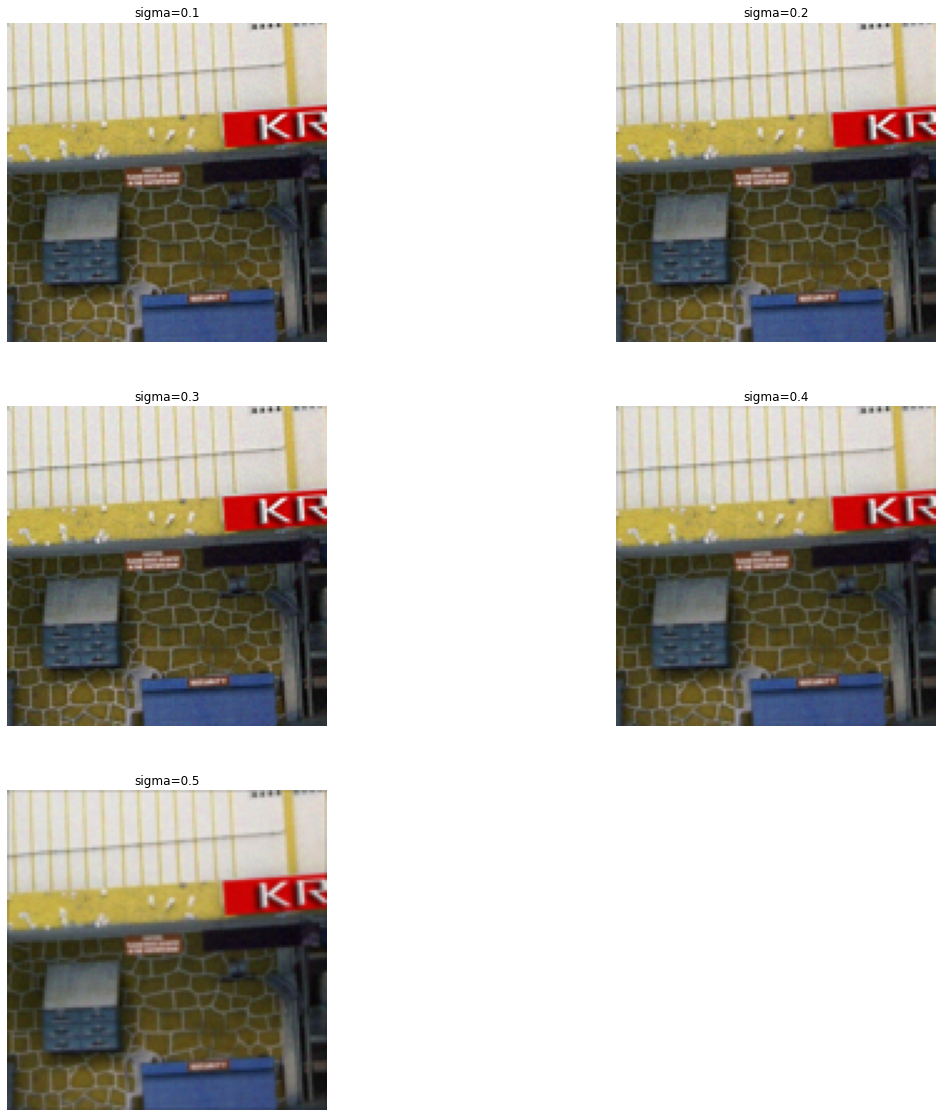

In [46]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(3, 2, 1)
plt.imshow(Gaussian[sigmas[0]])
plt.title("sigma=0.1")
plt.axis('off')
fig.add_subplot(3, 2, 2)
plt.imshow(Gaussian[sigmas[1]])
plt.title("sigma=0.2")
plt.axis('off')
fig.add_subplot(3, 2, 3)
plt.imshow(Gaussian[sigmas[2]])
plt.title("sigma=0.3")
plt.axis('off')
fig.add_subplot(3, 2, 4)
plt.imshow(Gaussian[sigmas[3]])
plt.title("sigma=0.4")
plt.axis('off')
fig.add_subplot(3, 2, 5)
plt.imshow(Gaussian[sigmas[4]])
plt.title("sigma=0.5")
plt.axis('off')

Text(0, 0.5, 'PSNR in dB')

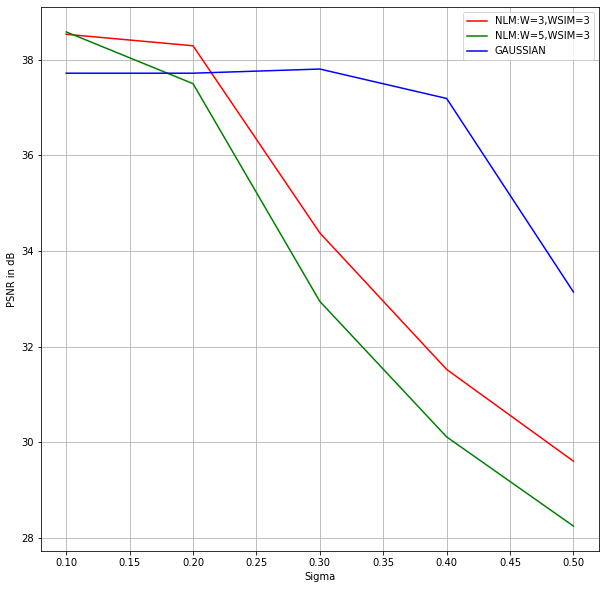

In [51]:
plt.figure(figsize=(10, 10))
plt.plot(sigmas,psnr_w_3,'r')
plt.plot(sigmas,psnr_w_5,'g')
plt.plot(sigmas,psnr_gaussian,'b')
plt.legend(["NLM:W=3,WSIM=3","NLM:W=5,WSIM=3","GAUSSIAN"])
plt.grid(True)
plt.xlabel("Sigma")
plt.ylabel("PSNR in dB")

## W=5, Wsim=3, Sigma=0.5, NLM

Text(0.5, 1.0, 'NLM filtered image patch,centered:38,46')

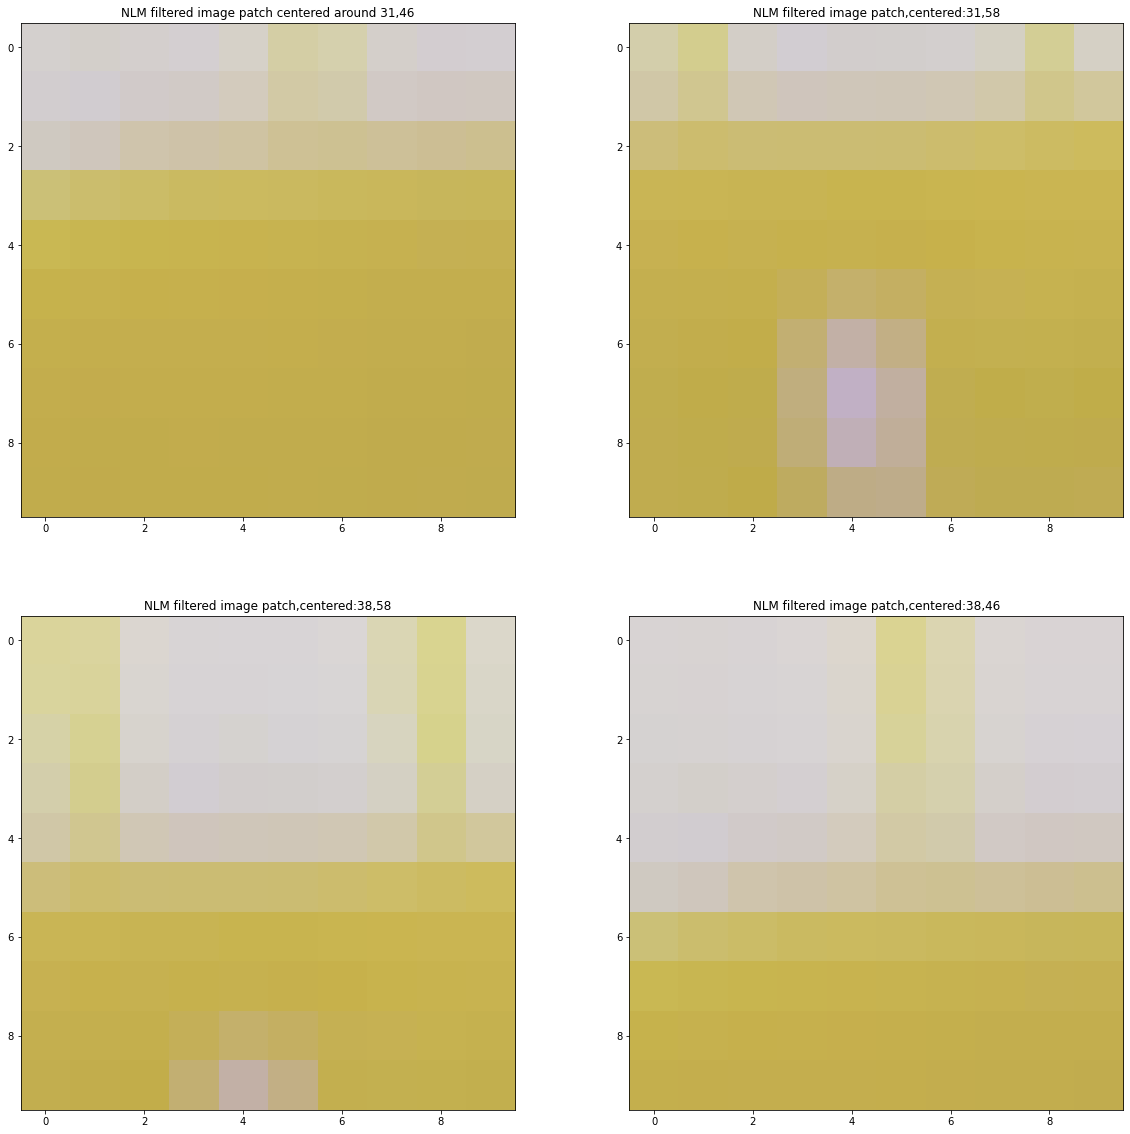

In [89]:
p1=(31,46)
p2=(38,58)
w=5
wsim=3
sig=0.5

denoised=NLM_data[(sigmas[4], W[1])]
noisy_1=g[36:46,41:51]
x_1=denoised[36:46,41:51]

noisy_2=g[36:46,53:63]
x_2=denoised[36:46,53:63]


noisy_3=g[33:43,53:63]
x_3=denoised[33:43,53:63]


noisy_4=g[33:43,41:51]
x_4=denoised[33:43,41:51]


fig=plt.figure(figsize=(20,20))
fig.add_subplot(2, 2, 1)
plt.imshow(x_1)
plt.title("NLM filtered image patch centered around 31,46")
fig.add_subplot(2, 2, 2)
plt.imshow(x_2)
plt.title("NLM filtered image patch,centered:31,58")
fig.add_subplot(2, 2, 3)
plt.imshow(x_3)
plt.title("NLM filtered image patch,centered:38,58")
fig.add_subplot(2, 2, 4)
plt.imshow(x_4)
plt.title("NLM filtered image patch,centered:38,46")

In [71]:
padded_image = zero_padded_image_colour(g, w, wsim)
d=w+wsim
Filter_1=weights(g[31-1-wsim:31+wsim,46-1-wsim:46+wsim],padded_image[31-1:31+2*d,46-1:46+2*d],d,wsim,sig)[1]
Filter_2=weights(g[31-1-wsim:31+wsim,58-1-wsim:58+wsim],padded_image[31-1:31+2*d,58-1:58+2*d],d,wsim,sig)[1]
Filter_3=weights(g[38-1-wsim:38+wsim,46-1-wsim:46+wsim],padded_image[38-1:38+2*d,46-1:46+2*d],d,wsim,sig)[1]
Filter_4=weights(g[38-1-wsim:38+wsim,58-1-wsim:58+wsim],padded_image[38-1:38+2*d,58-1:58+2*d],d,wsim,sig)[1]

(-0.5, 10.5, 10.5, -0.5)

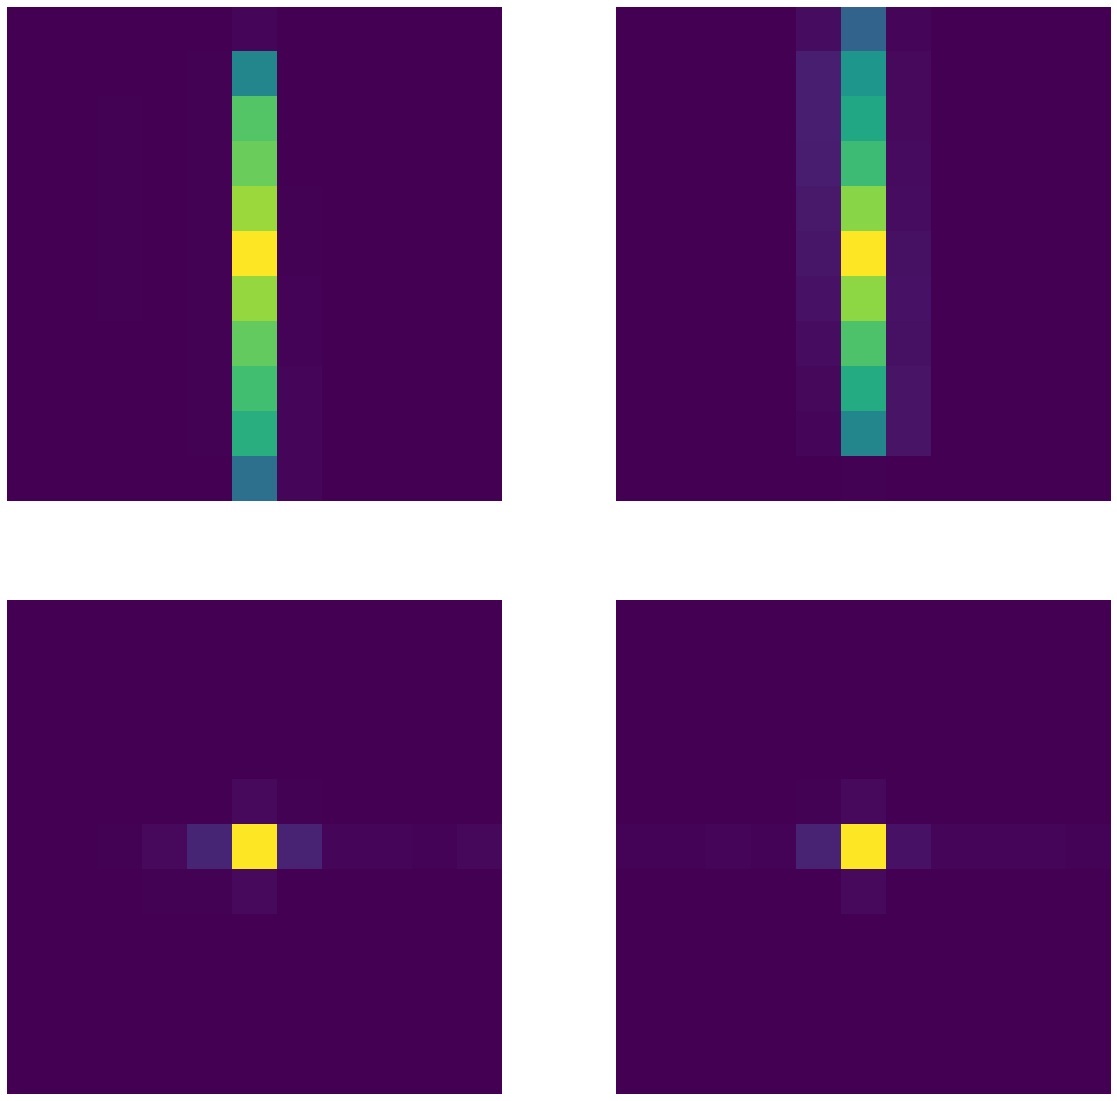

In [85]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(2, 2, 1)
plt.imshow(Filter_1)
plt.axis("off")
fig.add_subplot(2, 2, 2)
plt.imshow(Filter_2)
plt.axis("off")
fig.add_subplot(2, 2, 3)
plt.imshow(Filter_3)
plt.axis("off")
fig.add_subplot(2, 2, 4)
plt.imshow(Filter_4)
plt.axis("off")

## Sigma=1 for Gaussian Filtering

(-0.5, 4.5, 4.5, -0.5)

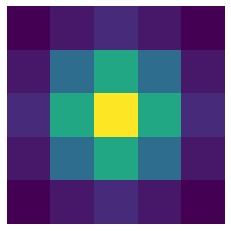

In [87]:
patch=kernel(1,5)
plt.imshow(patch)
plt.axis("off")

In [90]:
gaussian_image=gaussian_for_colour(g,1,11)

Text(0.5, 1.0, 'Gaussian FILTERED IMAGE CENTERED ABOURND: 38,46')

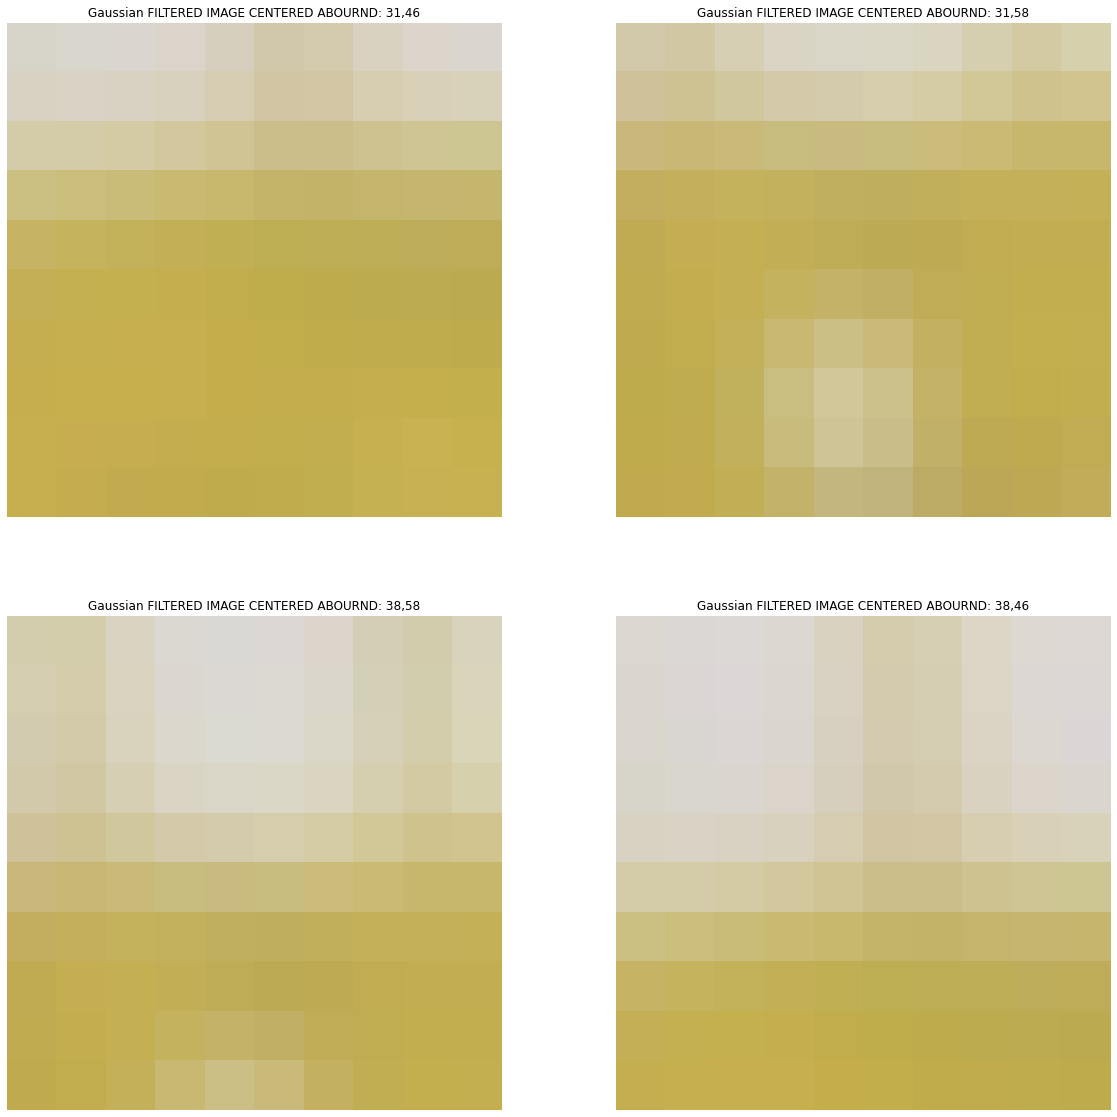

In [92]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(2, 2, 1)
plt.imshow(gaussian_image[36:46,41:51])
plt.axis("off")
plt.title("Gaussian FILTERED IMAGE CENTERED ABOURND: 31,46")
fig.add_subplot(2, 2, 2)
plt.imshow(gaussian_image[36:46,53:63])
plt.axis("off")
plt.title("Gaussian FILTERED IMAGE CENTERED ABOURND: 31,58")
fig.add_subplot(2, 2, 3)
plt.imshow(gaussian_image[33:43,53:63])
plt.axis("off")
plt.title("Gaussian FILTERED IMAGE CENTERED ABOURND: 38,58")
fig.add_subplot(2, 2, 4)
plt.imshow(gaussian_image[33:43,41:51])
plt.axis("off")
plt.title("Gaussian FILTERED IMAGE CENTERED ABOURND: 38,46")